## Read Data:

The script starts by importing necessary libraries (`pandas`, `numpy`, `seaborn`, `matplotlib.pyplot`) and reading a CSV file into a DataFrame (`df`).

## Exploratory Data Analysis (EDA):

Basic exploration of the dataset using `head()`, `describe()`, and checking for missing values using `isnull().sum()`.

## Handling Categorical Variables:

One-hot encoding is performed on categorical variables using `pd.get_dummies()`.

## Handling Missing Values:

Missing values are imputed using the k-nearest neighbors algorithm (`KNNImputer` from `sklearn.impute`).


## Feature Scaling and Train-Test Split:

Features are scaled using `MinMaxScaler`, and the dataset is split into training and testing sets.

## Model Selection:

Several classification models are chosen (`KNeighborsClassifier`, `GaussianNB`, `DecisionTreeClassifier`, `RandomForestClassifier`) for initial testing.

## Model Evaluation Without Resampling:

Classification reports are generated for each model to evaluate their performance on the imbalanced dataset.

## OverSampling (SMOTE):

The script uses the Synthetic Minority Over-sampling Technique (SMOTE) to oversample the minority class.

## Model Evaluation After OverSampling:

The same models are re-trained and evaluated on the oversampled dataset.

## UnderSampling:

Random under-sampling is performed to balance the class distribution.

## Model Evaluation After UnderSampling:

The models are re-trained and evaluated on the undersampled dataset.

## Combining OverSampling and UnderSampling (SMOTEENN):

The SMOTEENN technique, which combines SMOTE and Edited Nearest Neighbours (ENN), is applied.

## Model Evaluation After Combining OverSampling and UnderSampling:

The models are re-trained and evaluated on the combined dataset.

## Conclusion:

- The script provides classification reports for each model after different resampling techniques.
- It highlights that resampling techniques, particularly SMOTEENN, improve the model's ability to identify cases positive for stroke.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"./Cereberal_Dataset.csv")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [3]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [4]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

BMI and Smoking Stroke has a lot of NULL| values

In [5]:
df.shape

(43400, 12)

In [6]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
df['stroke'].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

Very imbalace 0,1 parameters

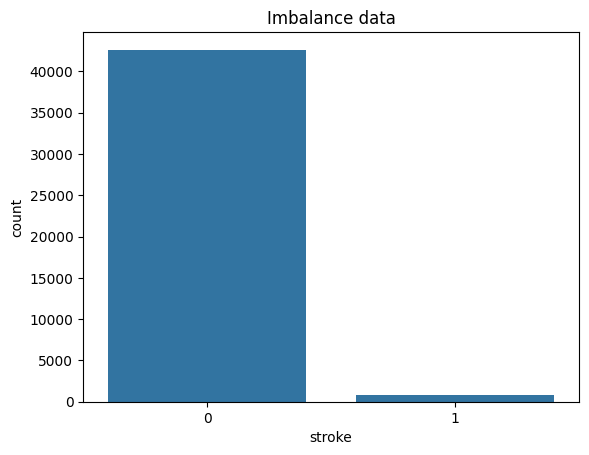

In [8]:
sns.countplot(x='stroke', data=df)
plt.title("Imbalance data")
plt.show()

## One Hot Encoding 

Converting the categorical values, indicator variables

In [9]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
df = pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'])
df.head(4)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,30669,3.0,0,0,95.12,18.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,False
1,30468,58.0,1,0,87.96,39.2,0,False,True,False,...,False,False,True,False,False,False,True,False,True,False
2,16523,8.0,0,0,110.89,17.6,0,True,False,False,...,False,False,True,False,False,False,True,False,False,False
3,56543,70.0,0,0,69.04,35.9,0,True,False,False,...,False,False,True,False,False,True,False,True,False,False


## Missing Value Handelling

In [11]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(missing_values=np.nan)
tab = imputer.fit_transform(df)
df_new = pd.DataFrame(tab, columns=df.columns)
df_new.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,30669.0,3.0,0.0,0.0,95.12,18.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,30468.0,58.0,1.0,0.0,87.96,39.2,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,16523.0,8.0,0.0,0.0,110.89,17.6,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,56543.0,70.0,0.0,0.0,69.04,35.9,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,46136.0,14.0,0.0,0.0,161.28,19.1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,32257.0,47.0,0.0,0.0,210.95,50.1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,52800.0,52.0,0.0,0.0,77.59,17.7,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,41413.0,75.0,0.0,1.0,243.53,27.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8,15266.0,32.0,0.0,0.0,77.67,32.3,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,28674.0,74.0,1.0,0.0,205.84,54.6,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [12]:
df_new.shape

(43400, 22)

The Columns has been transformed from 12 to 22

In [13]:
df_new.isnull().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [14]:
df_new.dtypes

id                                float64
age                               float64
hypertension                      float64
heart_disease                     float64
avg_glucose_level                 float64
bmi                               float64
stroke                            float64
gender_Female                     float64
gender_Male                       float64
gender_Other                      float64
ever_married_No                   float64
ever_married_Yes                  float64
work_type_Govt_job                float64
work_type_Never_worked            float64
work_type_Private                 float64
work_type_Self-employed           float64
work_type_children                float64
Residence_type_Rural              float64
Residence_type_Urban              float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
dtype: object

## Machine Learning Model

In [15]:
X = df_new.drop('stroke',axis=1)
y = df_new['stroke']

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report

In [18]:
knn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

models = [knn, nb, dt, rf]

for model in models:
    print("MODEL NAME: ", model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))

MODEL NAME:  KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     12785
         1.0       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020

MODEL NAME:  GaussianNB()
              precision    recall  f1-score   support

         0.0       1.00      0.15      0.26     12785
         1.0       0.02      0.99      0.04       235

    accuracy                           0.16     13020
   macro avg       0.51      0.57      0.15     13020
weighted avg       0.98      0.16      0.25     13020

MODEL NAME:  DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     12785
         1.0       0.05      0.06      0.05       235

    accuracy                           0.96     13020
   macro avg       0.51     

The models accurately predicts the 0 but not 1. The precision is close to zero in all the above cases, which means the model failed to predict the cases where chances for cerebral stroke was actually present. So the above models are useless.

## OverSampling


In [19]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=1)
X_os, y_os = os.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_os,y_os,test_size=0.3,random_state=1)

for model in models:
    print("MODEL NAME:",model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test,y_pred))

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     12883
         1.0       0.88      0.99      0.93     12688

    accuracy                           0.93     25571
   macro avg       0.94      0.93      0.93     25571
weighted avg       0.94      0.93      0.93     25571

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

         0.0       0.99      0.25      0.40     12883
         1.0       0.57      1.00      0.72     12688

    accuracy                           0.62     25571
   macro avg       0.78      0.62      0.56     25571
weighted avg       0.78      0.62      0.56     25571

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     12883
         1.0       0.97      0.98      0.97     12688

    accuracy                           0.97     25571
   macro avg       0.97      0.

After applying SMOTE technique, the precision increased. For KNN it is 0.88, for Decision Tree it is 0.97 and RandomForest it is 0.95. So oversampling resulted in a better model that is capable of identifying the cases positive for stroke.

## UnderSampling

In [20]:
from imblearn.under_sampling import RandomUnderSampler

us= RandomUnderSampler(random_state=1)
X_us, y_us = us.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_us,y_us,test_size=0.3,random_state=1)

for model in models:
    print("MODEL NAME:",model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test,y_pred))

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.67      0.72      0.70       229
         1.0       0.72      0.66      0.69       241

    accuracy                           0.69       470
   macro avg       0.69      0.69      0.69       470
weighted avg       0.70      0.69      0.69       470

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

         0.0       0.92      0.31      0.46       229
         1.0       0.60      0.98      0.74       241

    accuracy                           0.65       470
   macro avg       0.76      0.64      0.60       470
weighted avg       0.76      0.65      0.61       470

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.70      0.68      0.69       229
         1.0       0.70      0.72      0.71       241

    accuracy                           0.70       470
   macro avg       0.70      0.

### Combining Oversampling and Undersampling 

SMOTEEN combines SMOTE and Edited Nearest Neighbours(ENN). SMOTEEN performs upsampling and downsampling at the same time.

In [21]:
from imblearn.combine import SMOTEENN

sample = SMOTEENN()
X_over,y_over = sample.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,random_state=1)

In [22]:
for model in models:
    print("MODEL NAME:",model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test,y_pred))

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     11160
         1.0       0.95      1.00      0.98     12333

    accuracy                           0.97     23493
   macro avg       0.98      0.97      0.97     23493
weighted avg       0.98      0.97      0.97     23493

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

         0.0       0.99      0.28      0.44     11160
         1.0       0.61      1.00      0.75     12333

    accuracy                           0.66     23493
   macro avg       0.80      0.64      0.60     23493
weighted avg       0.79      0.66      0.60     23493

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     11160
         1.0       0.97      0.98      0.97     12333

    accuracy                           0.97     23493
   macro avg       0.97      0.

<b>End Note</b> : For the Cerebral Stroke Imbalanced data we could make a better model using resampling techniques.